In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
#DEMO-demographic
#DIQ-diabetes

#DBQ-diet behavior
#SMQ-smoker
#SMQRTU-tabacco smoker
#SMQSHS-second hand smoker
#ALQ-alcohol
#PAQ-phyisical activity
#DPQ-mental health (depression)
#SLQ-sleep disorder
#OCQ-occupation
#DR1TOT-nutrition intake

def read_as_df(filename):
    return pd.read_sas(filename)

df_demo= read_as_df('P_DEMO.xpt')[['SEQN','RIDRETH3']]
#1mexican american, 2hispanic,3white,4black,6asian,7other

df_diabetes=read_as_df('P_DIQ.xpt')[['SEQN','DIQ010']]#1 yes, 2 no, 3 boarder
df_diet=read_as_df('P_DBQ.XPT')[['SEQN', 'DBQ700', 'DBD910']]
#DBQ700how health is the diet 1excellent,...5poor
#num of frozen meals and pizza 

df_smoke=read_as_df('P_SMQ.XPT')[['SEQN','SMQ040']]#1 everyday,2somedays,3no,missing-no
df_alcohol=read_as_df('P_ALQ.XPT')[['SEQN','ALQ121']]#how often drink alcohol,0-10,missing-never drink
df_activity=read_as_df('P_PAQ.XPT')[['SEQN','PAD615','PAD630']]
#615-minutes vigorous work per day,10-900, missing-no work 
#630-minutes moderate work,10-900, missing-no work

df_nutri=read_as_df('P_DR1TOT.XPT') [['SEQN','DR1TSUGR', 'DR1TSFAT']]
#DR1TSUGR-total sugar intake(gm) 0-936
#DR1TSFAT-Total saturated fatty acids (gm) 0-268

df_mental=read_as_df('P_DPQ.XPT')[['SEQN','DPQ020','DPQ030','DPQ050']]
# 020: Feeling down, depressed, or hopeless 
# 030: Trouble sleeping or sleeping too much
# 050: Poor appetite or overeating
# 0 never, 1 serveral days, 2 more than half the days, 3 everyday
median_value = df_mental['DPQ020'].median()
df_mental['DPQ020'].fillna(median_value, inplace=True)
#DPQ-mental health (depression)
#SLQ-sleep disorder
#OCQ-occupation
#DR1TOT-nutrition intake

median_value = df_mental['DPQ030'].median()
df_mental['DPQ030'].fillna(median_value, inplace=True)

median_value = df_mental['DPQ050'].median()
df_mental['DPQ050'].fillna(median_value, inplace=True)



df_sleep=read_as_df('P_SLQ.XPT')[['SEQN','SLD012','SLQ300']]
# SLD012 sleep hours, '.' is missing value
# SLQ300 Usual sleep time on weekdays or workdays 77777 and 99999 are useless values, blank are missing value

df_occuption=read_as_df('P_OCQ.XPT')[['SEQN','OCD150','OCQ180']]
# OCD150 - Type of work done last week# 1 Working at a job or business, 2 With a job or business but not at work,	3 Looking for work,4 Not working at a job or business
# OCQ180 - Hours worked last week in total all jobs 77777, and 99999 are useless values


C:\Users\cfd1208\AppData\Local\Temp\ipykernel_5320\3993506625.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mental['DPQ020'].fillna(median_value, inplace=True)
C:\Users\cfd1208\AppData\Local\Temp\ipykernel_5320\3993506625.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [3]:
df_all=pd.DataFrame()
df_all=pd.merge(df_demo, df_diabetes, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_diet, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_smoke, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_alcohol, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_activity, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_nutri, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_mental, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_sleep, on='SEQN', how='outer')
df_all=pd.merge(df_all, df_occuption, on='SEQN', how='outer')
df_all.fillna(0, inplace=True)
df_all.columns


Index(['SEQN', 'RIDRETH3', 'DIQ010', 'DBQ700', 'DBD910', 'SMQ040', 'ALQ121',
       'PAD615', 'PAD630', 'DR1TSUGR', 'DR1TSFAT', 'DPQ020', 'DPQ030',
       'DPQ050', 'SLD012', 'SLQ300', 'OCD150', 'OCQ180'],
      dtype='object')

In [5]:
df_raced=[df_all[df_all['RIDRETH3']==i] for i in [1,2,3,4,6,7]]

<Axes: xlabel='PAD630'>

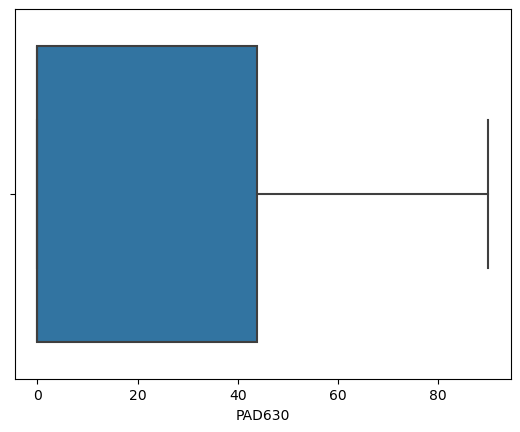

In [17]:
sb.boxplot(data=df_raced[3][df_raced[3]['DIQ010']==1.0],x='PAD630',showfliers=False)


<Axes: xlabel='PAD630'>

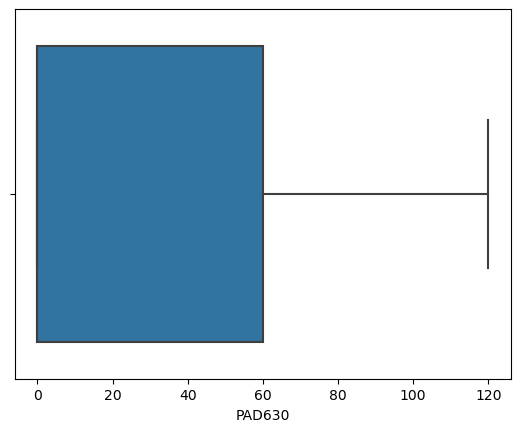

In [18]:
sb.boxplot(data=df_raced[1][df_raced[1]['DIQ010']==1.0],x='PAD630',showfliers=False)